In [1]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [2]:
df=pd.read_excel('C:\\Users\\474230\\Copy of case_study.xlsx',sheet_name='ProdA')

In [3]:
df.head(5)

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-04,6988,WINTER
1,ProductA,2018-05,6743,WINTER
2,ProductA,2018-06,4112,WINTER
3,ProductA,2018-07,5732,WINTER
4,ProductA,2018-08,5732,WINTER


In [ ]:
train.drop(columns=['SKU']).head()

In [5]:

df.Season.replace({'WINTER':'1','SPRING':'2','SUMMER':'3','AUTUMN':'4'} , inplace = True)


In [6]:
df['Season']=df.Season.astype(int)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
SKU         49 non-null object
ISO_Week    49 non-null object
Sales       49 non-null int64
Season      49 non-null int32
dtypes: int32(1), int64(1), object(2)
memory usage: 1.4+ KB


In [8]:
df['weekno']=df.ISO_Week.str.extract(r'[-](\d\d)').astype(int)


#s.str.extract(r'([ab])(\d)')

In [9]:
df.set_index('weekno',inplace=True)

In [10]:
df.head()

,SKU,ISO_Week,Sales,Season
weekno,,,,
4,ProductA,2018-04,6988,1
5,ProductA,2018-05,6743,1
6,ProductA,2018-06,4112,1
7,ProductA,2018-07,5732,1
8,ProductA,2018-08,5732,1


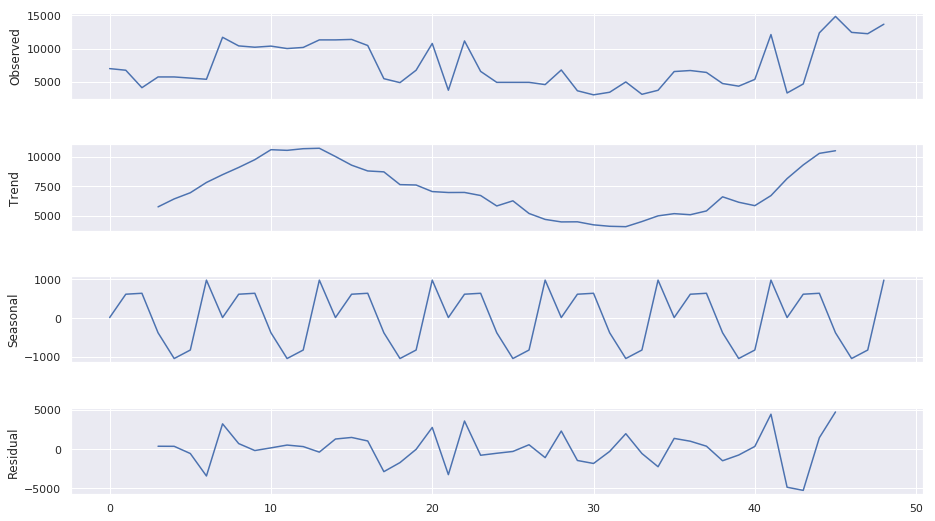

In [102]:
res = sm.tsa.seasonal_decompose(df.Sales.dropna(),freq=7)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [11]:
train=df.iloc[0:38]
test=df.iloc[38:]

In [12]:
test

,SKU,ISO_Week,Sales,Season
weekno,,,,
42,ProductA,2018-42,4740,4
43,ProductA,2018-43,4341,4
44,ProductA,2018-44,5363,4
45,ProductA,2018-45,12120,4
46,ProductA,2018-46,3314,4
47,ProductA,2018-47,4673,4
48,ProductA,2018-48,12376,4
49,ProductA,2018-49,14853,1
50,ProductA,2018-50,12447,1


In [14]:
res = sm.tsa.adfuller(df['Sales'].dropna(),regression='ct')
res
#print('p-value:{}'.format(res[1]))

(-0.829104727344663,
 0.9631416257858468,
 3,
 45,
 {'1%': -4.17546072702332,
  '5%': -3.513014598079561,
  '10%': -3.186691646090535},
 700.4726589065754)

In [171]:
res = sm.tsa.adfuller(train['Sales'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))
#p-value:0.04256776036249899


p-value:0.04256776036249899


In [211]:
res = sm.tsa.adfuller(df['Sales'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.8416948297534832e-07


In [108]:
res = sm.tsa.adfuller(train['Sales'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:7.994574952237335e-16


If the p value is >0.05 during the ADF (Augmented Dickey- Fuller) test of the time series then the series is said to be Non-stationary and it accepts NULL hypothesis. If p value is <= 0.05, it rejects NULL hypothesis which is symbolized  as H0, and it is said to be stationary where data doesn't have unit root. Alternate Hypothesis is symbolized as H1.

Read more on Brainly.in - https://brainly.in/question/8027210#readmore

Autocorrelogram & Partail Autocorrelogram is useful that to estimate each models parametaers.

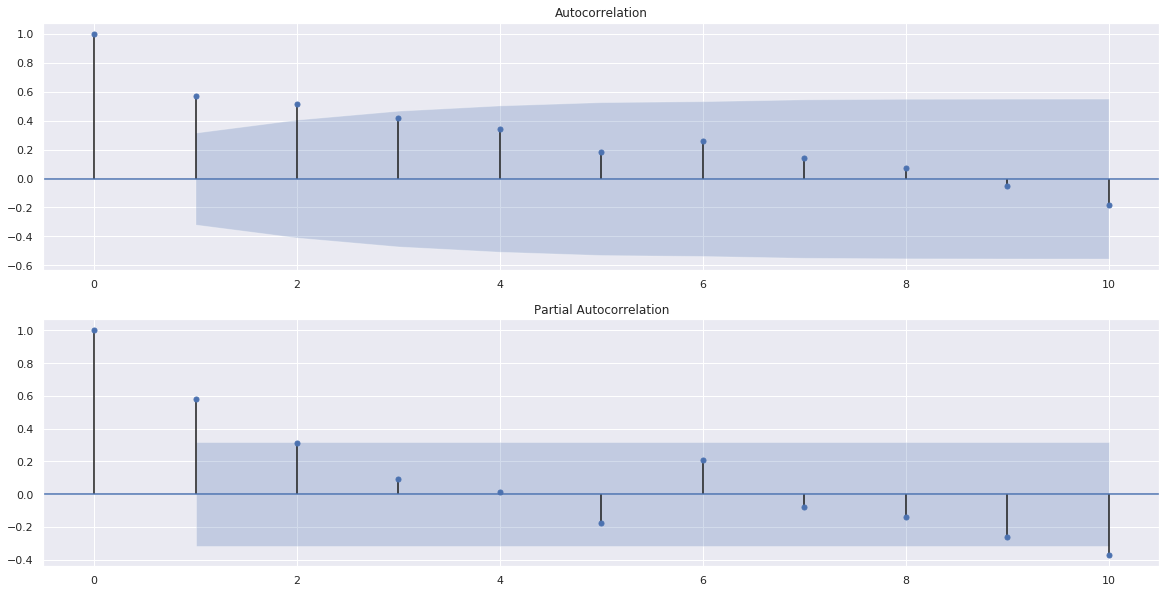

In [172]:
#we use tra.diff()(differenced data), because this time series is unit root process.
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(train['Sales'].dropna(), lags=10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train['Sales'].dropna(), lags=10, ax=ax[1])
plt.show()

In [ ]:
#train_test_split
tr_start,tr_end =0,38
te_start,te_end = 39,52
tra = df.loc[tr_start:tr_end,'Sales'].dropna()
tes = df.loc[te_start:te_end,'Sales'].dropna()

In [212]:
resDiff = sm.tsa.arma_order_select_ic(train['Sales'].diff().dropna(), max_ar=7, max_ma=7, ic='aic', trend='c')
#resDiff
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

D:\Development_Avecto\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARMA(p,q) = (0, 1) is the best.


In [118]:
resDiff['aic_min_order']

(2, 0)

In [135]:
arima = sm.tsa.statespace.SARIMAX(train['Sales'].diff().dropna(),order=(2,1,0)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   38
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -339.429
Date:                Wed, 03 Jul 2019   AIC                            684.859
Time:                        15:50:44   BIC                            689.691
Sample:                             0   HQIC                           686.563
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4928      0.132     -3.731      0.000      -0.752      -0.234
ar.L2         -0.2132      0.185     -1.153      0.249      -0.576       0.149
sigma2      5.522e+06   1.12e+06      4.941      0.000    3.33e+06    7.71e+06
===================================================================================
Ljung-Box (Q):                       31.19   Jarque-Bera (JB):                 1.57
Prob(Q):                              0.70   Prob(JB):                         0.46
Heteroskedasticity (H):               0.53   Skew:                             0.26
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [197]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_end,te_end)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

ARIMA model MSE:19839088.54984785


In [199]:
df.head()

,SKU,ISO_Week,Sales,Season
weekno,,,,
4,ProductA,2018-04,6988,1
5,ProductA,2018-05,6743,1
6,ProductA,2018-06,4112,1
7,ProductA,2018-07,5732,1
8,ProductA,2018-08,5732,1


In [ ]:
df.loc[tr_start:tr_end,['Sales','Season']]

In [204]:
#train_test_split
tr_start,tr_end =0,38
te_start,te_end = 39,52
tra = df.loc[tr_start:tr_end,['Sales','Season']].dropna()
tes = df.loc[te_start:te_end,['Sales','Season']].dropna()

In [210]:
arimax = sm.tsa.statespace.SARIMAX(tra,order=(2,1,0)).fit()
arimax.summary()

ValueError: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions

In [198]:
from sklearn.metrics import mean_squared_error
pred = arimax.predict(tr_end,te_end )[1:]
print('ARIMAX model MSE:{}'.format(mean_squared_error(tes,pred)))

NameError: name 'arimax' is not defined

In [76]:
model = VAR(endog=train.drop(columns=['SKU','ISO_Week']))
model_fit = model.fit()


In [77]:

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [85]:
cols=['Sales','Season','weekno']


In [93]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,3):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Sales is :  6625.88773350385
rmse value for Season is :  2.2534686132880615
rmse value for weekno is :  8.409984213395467e-14
